# OMI Subsetting using Harmony L2SS-py in PROD
## - Run Variable, Temporal, Bounding Box Subsets for OMSO2 and OMNO2
## - Load into Panoply and Xarray to satisfy objectives

In [1]:
import datetime as dt
from IPython.display import display, JSON
from harmony import BBox, Client, Collection, Request
from harmony.config import Environment
import os
import netCDF4 as nc4
import numpy as np
import xarray as xr
import tranform_he5

In [2]:
def harmony_request_UAT(my_id, boundingbox, variables, my_start, my_stop):
    harmony_client = Client(env=Environment.PROD)
    collection = Collection(id=my_id)

    request = Request(
        collection=collection,
        spatial=BBox(boundingbox[0],boundingbox[1],boundingbox[2],boundingbox[3]),
        temporal = {
           'start': my_start,
           'stop' : my_stop
        },
        variables = variables,
        max_results=1
    )
    job_id = harmony_client.submit(request)
    myURL = 'https://harmony.uat.earthdata.nasa.gov/jobs/'+job_id
    print (myURL)
    harmony_client.wait_for_processing(job_id, show_progress=True)
    results = harmony_client.download_all(job_id, directory='tests/data', overwrite=True)
    file_names = [f.result() for f in results]
    print (file_names)
    return file_names[0]

In [3]:
def harmony_request_UAT_novars(my_id, boundingbox, variables, my_start, my_stop):
    harmony_client = Client(env=Environment.PROD)
    collection = Collection(id=my_id)

    request = Request(
        collection=collection,
        spatial=BBox(boundingbox[0],boundingbox[1],boundingbox[2],boundingbox[3]),
        temporal = {
           'start': my_start,
           'stop' : my_stop
        },
        max_results=1
    )
    job_id = harmony_client.submit(request)
    myURL = 'https://harmony.uat.earthdata.nasa.gov/jobs/'+job_id
    print (myURL)
    harmony_client.wait_for_processing(job_id, show_progress=True)
    results = harmony_client.download_all(job_id, directory='tests/data', overwrite=True)
    file_names = [f.result() for f in results]
    print (file_names)
    return file_names[0]

## Run OMI SO2
### - list groups and variables
### - import data group in to xarray
### - plot in Panoply

In [4]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400.he5

/                        Group
/HDFEOS                  Group
/HDFEOS/ADDITIONAL       Group
/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/AlgorithmFlag_SnowIce Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudPressure Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudRadianceFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_PBL Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amoun

## Full Granule

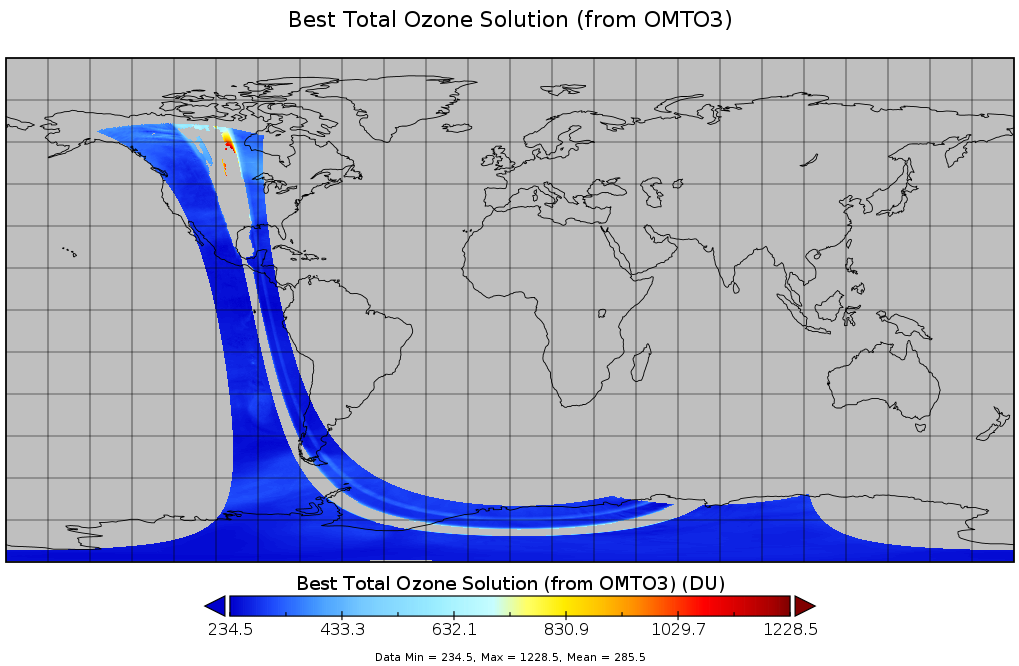

In [31]:
test_file = harmony_request_UAT_novars('C1239966837-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,10), dt.datetime(2022,1,10,21,50))

https://harmony.uat.earthdata.nasa.gov/jobs/9668f1cd-7923-4e2f-940b-d3d507d6c084


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


In [10]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_allvars.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/AlgorithmFlag_SnowIce Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudPressure Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudRadianceFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_PBL Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_STL Dataset {1643, 60}
/HDFEOS/SWATH

## Variable Subset

In [5]:
test_file = harmony_request_UAT('C1239966837-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,10), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/da3910f6-ce25-453d-944b-e031515ca101


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


In [12]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted_var.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Latitude Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Longitude Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Time Dataset {1643}
/phony_dim_0             Dataset {1643}
/phony_dim_1             Dataset {60}


## Xarray import data

In [13]:
nc_dataset = nc4.Dataset('tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted_var.nc4')
nc_cut_set = nc_dataset.groups['HDFEOS'].groups['SWATHS'].groups['OMI Total Column Amount SO2'].groups['Data Fields']
xr_dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(nc_cut_set))

for name, variable in xr_dataset.items():
    print (name)
    print (xr_dataset[name][200:300][50])



ColumnAmountO3
<xarray.DataArray 'ColumnAmountO3' (phony_dim_1: 60)>
array([252.5731 , 247.29158, 245.36237, 247.14052, 252.16678, 257.50183,
       260.80328, 261.6549 , 260.30487, 261.31198, 262.1985 , 264.36398,
       266.2293 , 268.95465, 272.78815, 274.27905, 274.356  , 274.73267,
       274.62598, 274.90396, 276.8338 , 278.597  , 279.25482, 279.11646,
       278.25912, 278.52695, 277.8538 , 276.82968, 277.24677, 275.66293,
       274.7599 , 277.14304, 278.0996 , 277.64343, 279.57166, 537.8033 ,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan, 609.7466 , 423.7495 , 327.6974 , 293.30585,
       279.2895 , 273.20117, 271.57083, 274.16068, 279.24707, 329.0725 ,
       311.97974, 287.8747 , 289.96252, 292.68698, 297.6845 , 297.3728 ],
      dtype=float32)
Dimensions without coordinates: phony_dim_1
Attributes:
    Units:         DU
    Title:         Best Total Ozone Solution (from OMTO3)
    ValidRange:    [ 50. 700.]
    MissingV

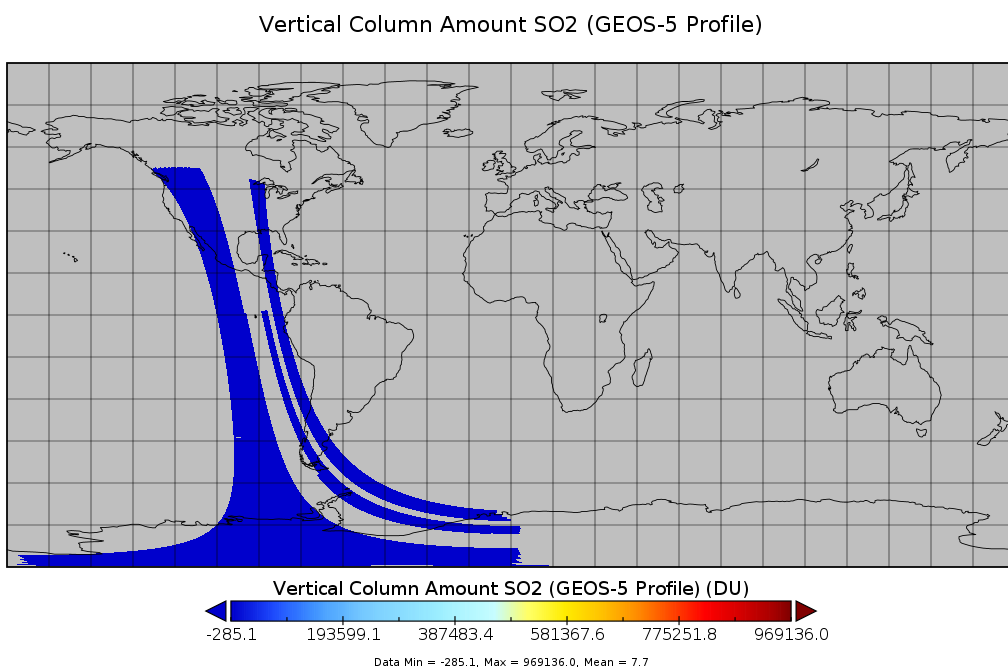

## Temporal Subset

In [21]:
test_file = harmony_request_UAT('C1239966837-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,50), dt.datetime(2022,1,10,20,50))

https://harmony.uat.earthdata.nasa.gov/jobs/0a5bd620-a657-4a0a-aa64-492a79f0041e


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


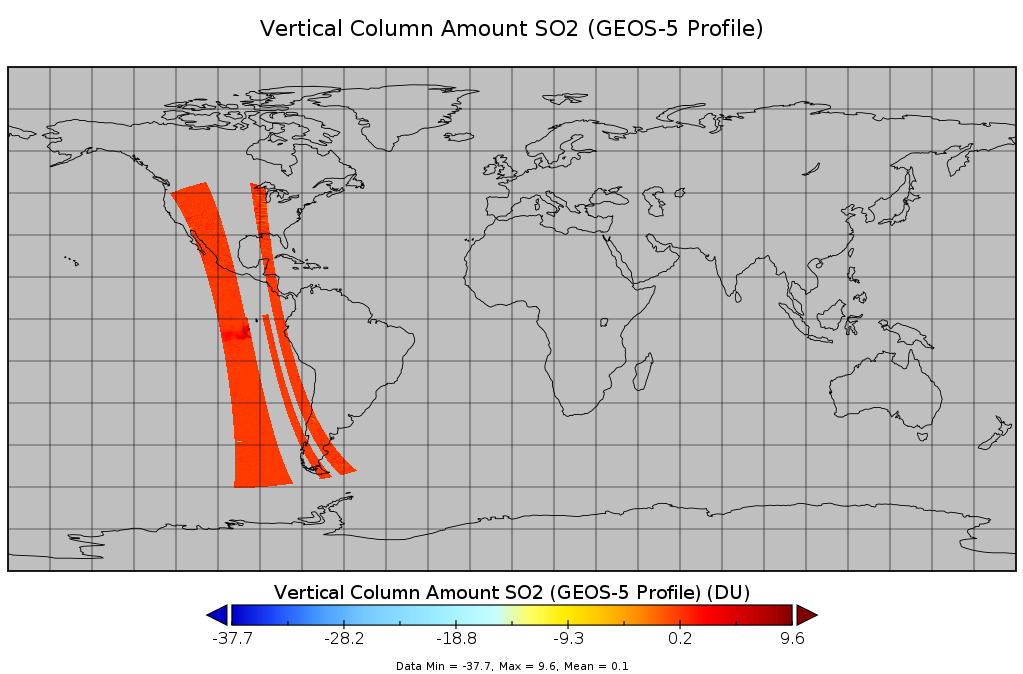

In [22]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted_temporal.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {845, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {845, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Latitude Dataset {845, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Longitude Dataset {845, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Time Dataset {845}
/phony_dim_0             Dataset {845}
/phony_dim_1             Dataset {60}


In [23]:
test_file = harmony_request_UAT('C1239966837-GES_DISC', (-180,-20,180,20), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,10), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/7f6b17bb-f385-4faa-83e4-69acbe7ad242


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


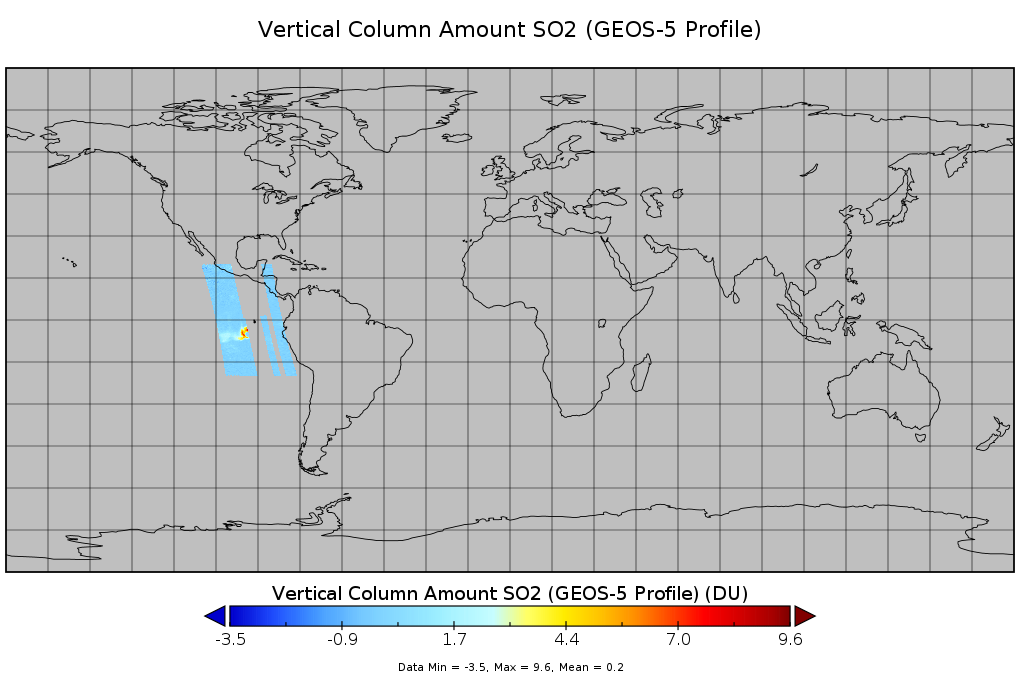

In [24]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted_bbox.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {369, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {369, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Latitude Dataset {369, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Longitude Dataset {369, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Time Dataset {369}
/phony_dim_0             Dataset {369}
/phony_dim_1             Dataset {60}


## OMI NO2

## Variable Subset

In [25]:
test_file = harmony_request_UAT('C1239966842-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/CloudFraction',
                                                                            '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/MeasurementQualityFlags'], 
                                            dt.datetime(2022,1,10,19,20), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/159eaff7-4229-48a1-b718-5a5e9fd2e5f0


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMNO2_2022m0110t1900-o93033_v003-2022m0331t001504_subsetted.nc4']


In [27]:
!h5ls -r tests/data/OMI-Aura_L2-OMNO2_2022m0110t1900-o93033_v003-2022m0331t001504_subsetted.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/ColumnAmountNO2 Group
/HDFEOS/SWATHS/ColumnAmountNO2/Data\ Fields Group
/HDFEOS/SWATHS/ColumnAmountNO2/Data\ Fields/CloudFraction Dataset {1643, 60}
/HDFEOS/SWATHS/ColumnAmountNO2/Data\ Fields/MeasurementQualityFlags Dataset {1643}
/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation\ Fields/Latitude Dataset {1643, 60}
/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation\ Fields/Longitude Dataset {1643, 60}
/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation\ Fields/Time Dataset {1643}
/phony_dim_0             Dataset {1643}
/phony_dim_1             Dataset {60}


## Xarray import data

In [28]:
nc_dataset = nc4.Dataset('tests/data/OMI-Aura_L2-OMNO2_2022m0110t1900-o93033_v003-2022m0331t001504_subsetted.nc4')
nc_cut_set = nc_dataset.groups['HDFEOS'].groups['SWATHS'].groups['ColumnAmountNO2'].groups['Data Fields']
xr_dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(nc_cut_set))

for name, variable in xr_dataset.items():
    print (name)
    print (xr_dataset[name][400:600][30])


CloudFraction
<xarray.DataArray 'CloudFraction' (phony_dim_1: 60)>
array([ 767.,  703.,  665.,  684.,  709.,  555.,  494.,  388.,  456.,  532.,
        526.,  636.,  551.,  434.,  423.,  566.,  328.,  251.,  529.,  601.,
        537.,  628.,  648.,  781.,  732.,  720.,  607.,  403.,  395.,  232.,
        238.,  443.,  667.,  598.,  613.,  314.,  189.,  111.,    0.,    0.,
          0.,    0.,    0., 1000.,    0.,    0., 1000., 1000., 1000., 1000.,
       1000.,  960.,  913.,  573.,  827.,  900.,  767.,  677.,  502.,  432.],
      dtype=float32)
Dimensions without coordinates: phony_dim_1
Attributes:
    MissingValue:           -32767
    ScaleFactor:            0.001
    Offset:                 0.0
    Title:                  Effective cloud fraction
    Units:                  NoUnits
    UniqueFieldDefinition:  OMI-specific
MeasurementQualityFlags
<xarray.DataArray 'MeasurementQualityFlags' ()>
array(0.)
Attributes:
    Units:                  NoUnits
    MissingValue:           255


## Bounding Box Subset

In [29]:
test_file = harmony_request_UAT('C1239966842-GES_DISC', (-180,-20,180,20), ['/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/CloudFraction',
                                                                            '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/MeasurementQualityFlags'], 
                                            dt.datetime(2022,1,10,19,20), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/bca3f0a3-474a-48e6-a64d-d39230d2e29b


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMNO2_2022m0110t1900-o93033_v003-2022m0331t001504_subsetted.nc4']


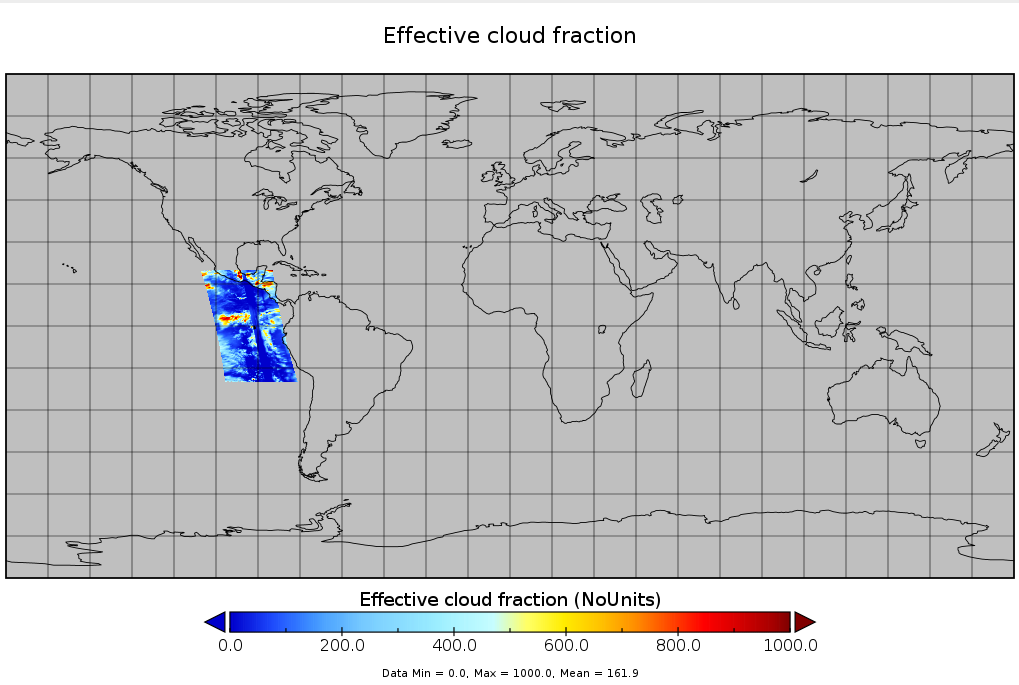

## Temporal Subset

In [30]:
test_file = harmony_request_UAT('C1239966842-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/CloudFraction',
                                                                            '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/MeasurementQualityFlags'], 
                                            dt.datetime(2022,1,10,19,20), dt.datetime(2022,1,10,19,55))

https://harmony.uat.earthdata.nasa.gov/jobs/ef6eb695-e6f9-4ace-868d-77e078f7d5cb


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMNO2_2022m0110t1900-o93033_v003-2022m0331t001504_subsetted.nc4']


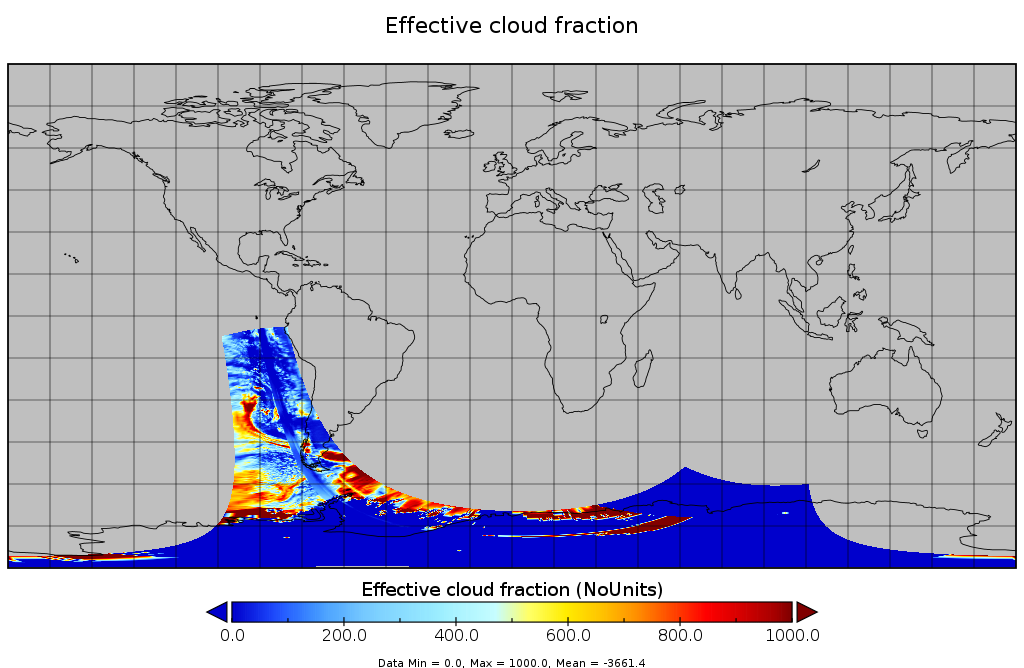